In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('datasets/training_set_VU_DM.csv')

In [7]:
#convert datetime 
df['date_time'] = pd.to_datetime(df['date_time'])

#to year
df['year'] = df['date_time'].dt.year

#to month
df['month'] = df['date_time'].dt.month

#to day of the week
df['day'] = df['date_time'].dt.dayofweek

#to hour
df['hour'] = df['date_time'].dt.hour

In [8]:
#make column with Boolean value for whether it was a weekend day
df['weekend'] = np.where(df['day'] < 5, 0, 1)

In [9]:
#make column with Boolean value for whether the country of the hotel is different from the origin country of the user
df['is_international_stay'] = np.where(df['visitor_location_country_id'] == df['prop_country_id'], 0, 1)

In [10]:
#make column with Boolean value for whether the srch_length_of_stay is 1 and booking_bool is True
df['price_per_night'] = np.where((df['srch_length_of_stay'] == 1) & (df['booking_bool'] == 1), df['price_usd'], "NaN")

In [11]:
#make column with Boolean value for when children are sought for in the search and a hotel was present in the search result
df['children_accepted'] = np.where((df['srch_children_count'] > 0) & (df['prop_id'] > 0), 1, 0)

In [12]:
#make column with mean date of stay
df['mean_date_stay'] = df['date_time'] + pd.to_timedelta(df['srch_booking_window'], unit='d') + (pd.to_timedelta(df['srch_length_of_stay'], unit='d')/2)
#skip hours and minutes
df['mean_date_stay'] = df['mean_date_stay'].dt.date

In [13]:
#convert mean_date to number of day in year
df['mean_date_stay'] = pd.to_datetime(df['mean_date_stay'])
df['mean_day_stay'] = df['mean_date_stay'].dt.dayofyear

In [14]:
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

#make column with season
df['season_stay'] = np.where(df['mean_day_stay'].isin(spring), 'spring', np.where(df['mean_day_stay'].isin(summer), 'summer', np.where(df['mean_day_stay'].isin(fall), 'fall', 'winter')))

<AxesSubplot:xlabel='season_stay'>

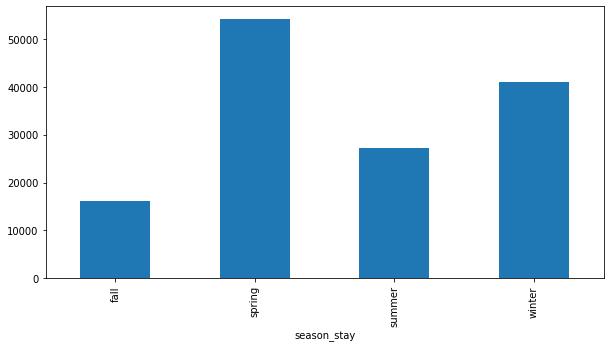

In [15]:
#plot histogram of seasons against booking_bool
df.groupby('season_stay')['booking_bool'].sum().plot(kind='bar', figsize=(10,5))

So most hotels are booked for spring, then winter, then summer, then fall.